In [11]:
import os
from PyPDF2 import PdfReader

pdfs = os.listdir("./pdf")
pdfs[0]

reader = PdfReader("./pdf/" + pdfs[0])
page = reader.pages[0]

print(page.extract_text())

Challenges in HPCQC Integration
Amr Elsharkawy∗, Xiao-Ting Michelle To†, Philipp Seitz∗, Yanbin Chen∗,
Yannick Stade∗, Manuel Geiger∗, Qunsheng Huang∗, Xiaorang Guo∗,
Muhammad Arslan Ansari∗, Martin Ruefenacht‡, Laura Schulz‡,
Sven Karlsson§, Christian B. Mendl∗, Dieter Kranzlm ¨uller†‡and Martin Schulz∗‡
∗School of Computation, Information and Technology, Technical University of Munich, Garching, Germany
Email: {amr.elsharkawy,huangq,schulzm }@in.tum.de,
{philipp.seitz,yanbin.chen,yannick.stade,manuel.geiger,xiaorang.guo,arslan.ansari,christian.mendl }@tum.de
†MNM Team, Ludwig-Maximilians-Universit ¨at in Munich, Munich, Germany
Email: michelle.to@nm.ifi.lmu.de, kranzlmueller@ifi.lmu.de
‡Leibniz Supercomputing Centre, Garching, Germany
Email: {Martin.Ruefenacht,Laura.Schulz }@lrz.de
§Technical University of Denmark, Denmark
Email: svea@dtu.dk
Abstract —Quantum computing’s potential as an adjunct to
high-performance computing (HPC) infrastructure is clear, but
the integration of the tw

In [13]:
import os
import pandas as pd
from PyPDF2 import PdfReader

# Directory containing PDF files
pdf_directory = "./pdf"

# List to store the extracted text from each PDF
pdf_texts = []

# Iterate through all PDF files in the directory
for pdf_file in os.listdir(pdf_directory):
    if pdf_file.endswith(".pdf"):
        pdf_path = os.path.join(pdf_directory, pdf_file)
        
        # Read the PDF
        reader = PdfReader(pdf_path)
        
        # Extract text from all pages and concatenate
        full_text = ""
        for page in reader.pages:
            full_text += page.extract_text()
        
        # Append the full text to the list
        pdf_texts.append(full_text)

# Create a DataFrame
df = pd.DataFrame({"full_text": pdf_texts})
df

,full_text
0,Quantum Computing Platforms: Assessing the\nIm...
1,Research on Quality Model for Quantum Simulato...
2,T owards a Set of Metrics for Quantum Circuits...
3,Some Size and Structure Metrics for\nQuantum S...
4,José Maria Fernandes\nGuilherme H. TravassosVa...
5,Copyright © 2020 for this paper by its author...
6,Vol.:(0123456789)Software Quality Journal (202...
7,PersPective\nhttps:/ / doi.org/10.1038/s43588-...
8,An Exploratory Study on the Challenges of\nEng...
9,Martin Shepperd\nFernando Brito e AbreuAlberto...


In [109]:
import os
import pandas as pd
import re
import nltk
from PyPDF2 import PdfReader
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove trailing spaces and convert to lowercase
    text = text.strip().lower()
    
    # Remove stop words, custom ignore words, and words with length <= 3
    stop_words = set(stopwords.words('english'))
    ignore_words = set(['unal', 'authorized', 'exclusive', 'switzerland', 'shepperd', 'ed', 'posteriori', 'restriction', 'ccis', 'yes', 'fig', 'vol', 'utc', 'httpsdoiorg', 'lnsc', 'quatic', 'rst', 'universidad', 'nacional', 'colombia', 'use', 'limited', 'licensed', 'april', 'downloaded', 'click'])
    stop_words.update(ignore_words)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) >= 3]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

pdf_directory = "./pdf"
pdf_texts = []

for pdf_file in os.listdir(pdf_directory):
    if pdf_file.endswith(".pdf"):
        pdf_path = os.path.join(pdf_directory, pdf_file)
        reader = PdfReader(pdf_path)
        full_text = ""
        for page in reader.pages:
            full_text += page.extract_text()
        cleaned_text = clean_text(full_text)
        pdf_texts.append(cleaned_text)

df_clean = pd.DataFrame({"full_text": pdf_texts})

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cristianmarquezbarrios/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cristianmarquezbarrios/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cristianmarquezbarrios/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [111]:
df_clean

,full_text
0,quantum computing platform assessing impact qu...
1,research quality model quantum simulator softw...
2,owards set metric quantum circuit understandab...
3,size structure metric quantum software jianjun...
4,jos maria fernandes guilherme travassosvalenti...
5,copyright paper author permitted creative comm...
6,volsoftware quality journal httpsdoiorgsy quan...
7,perspective http doiorgsinformation science lo...
8,exploratory study challenge engineering quantu...
9,martin fernando brito abreualberto rodrigues s...


In [113]:
csv_file_path = "pdf_full_texts.csv"
df_clean.to_csv(csv_file_path, index=False)

In [115]:
import re
import multidict as multidict
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# python -m nltk.downloader stopwords
# python -m nltk.downloader wordnet

def process_text(text, number_of_words=0):
    # Split words
    words = text.split()

    # create phrases
    if (number_of_words > 1):
        words = [' '.join(words[i: i + number_of_words]) for i in range(len(words) - number_of_words + 1)]
    
    return words

def create_word_cloud(text, title, min_occurrence=2, min_word_length=0, number_of_words=0):
    fullTermsDict = multidict.MultiDict()
    words = process_text(' '.join(text), number_of_words)

    freq_dict = {}
    for word in words:
        freq_dict[word] = freq_dict.get(word, 0) + 1

    for key in freq_dict:
        occurrence = freq_dict[key]
        if (occurrence >= min_occurrence):
            fullTermsDict.add(key, occurrence)

    wc = WordCloud(background_color='white', width=800, height=400, min_word_length=min_word_length)#.generate(final_text)
    wc.generate_from_frequencies(fullTermsDict)

    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

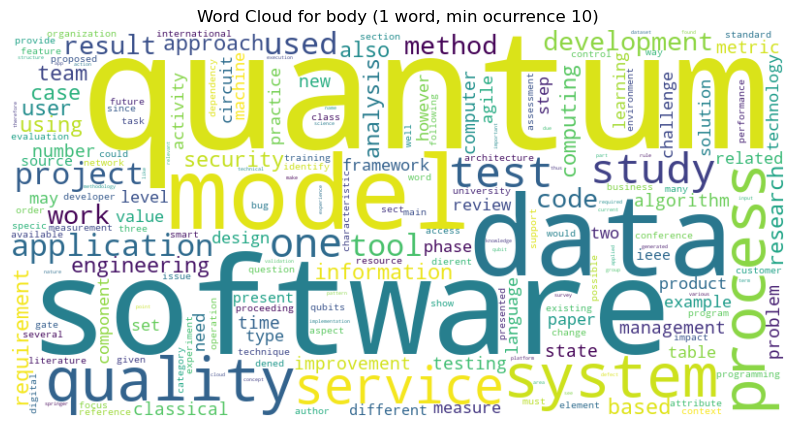

In [119]:
# Word cloud for single word title
create_word_cloud(df_clean['full_text'], 'Word Cloud for body (1 word, min ocurrence 10)', min_occurrence=10, number_of_words=1, min_word_length=2)

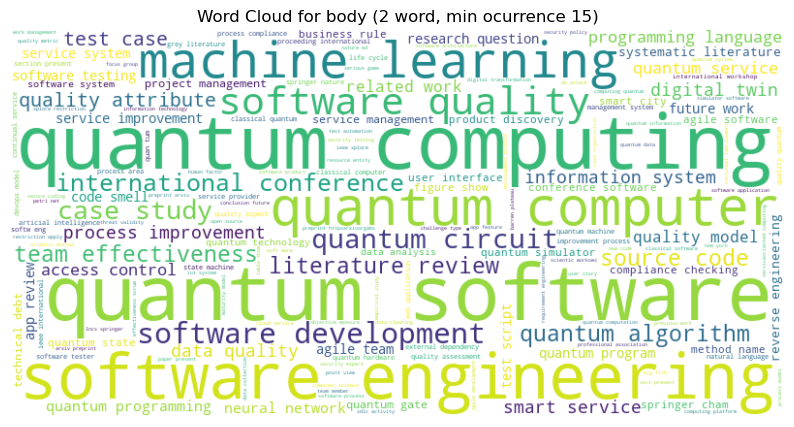

In [121]:
# Word cloud for single word title
create_word_cloud(df_clean['full_text'], 'Word Cloud for body (2 word, min ocurrence 15)', min_occurrence=15, number_of_words=2)

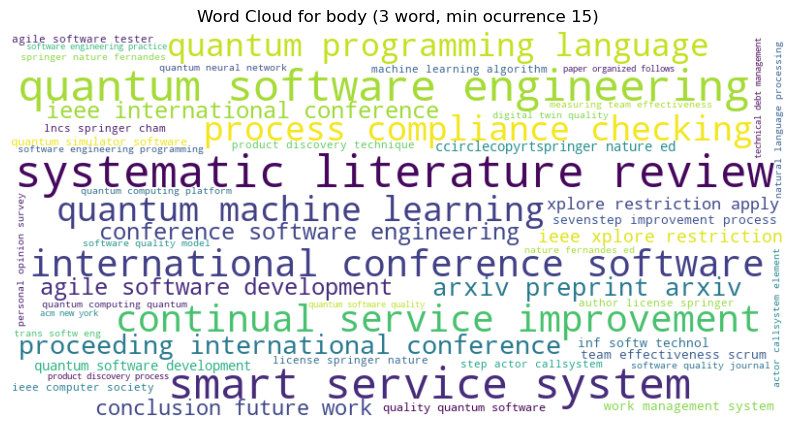

In [123]:
# Word cloud for single word title 
create_word_cloud(df_clean['full_text'], 'Word Cloud for body (3 word, min ocurrence 15)', min_occurrence=15, number_of_words=3)

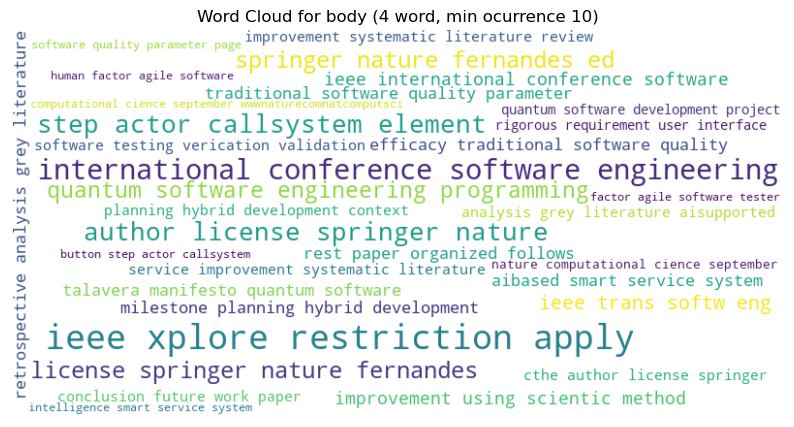

In [125]:
# Word cloud for single word title 
create_word_cloud(df_clean['full_text'], 'Word Cloud for body (4 word, min ocurrence 10)', min_occurrence=10, number_of_words=4)